# Benchmarking rechtsbibliotheken van de Universiteit Antwerpen en de Universiteit Hasselt

#### Doelstelling van de studie

Deze studie gebruikt de bibliografische gegevens uit de Anet-catalogus, beheerd met het bibliotheeksysteem Brocade (dataset op 30/6/2021).
De dataset wordt geëxporteerd als SQLite databank en deze wordt bevraagd met de hulp van Python libraries (sqlite3, pandas en matplotlib).

#### Parameters

- Beperking van de analyse tot een deel van de papieren boekencollecties, namelijk de monografieën en de naslagwerken aanwezig in de leeszalen (open kast). Voor de Universiteit Antwerpen (UAntwerpen) werden de boeken aanwezig in de cluster Rechten van de Stadscampus geanalyseerd, voor de Rechtsbibliotheek Limburg (RBLimburg) de boeken aanwezig in de leeszaal. 

- De plaatskenmerken in beide instellingen worden gevormd door het acroniem van de collectie (in beide gevallen is dit RECH), de UDC code (bv. 34), de relator (elk soort publicatie heeft een relator, bv E voor tijdschriften, G voor monografieën, A voor naslagwerken, enz.), en het jaar van uitgave. Deze studie betreft alle relatoren, behalve de relator E. De reden om de tijdschriften uit te sluiten is dat deze publicaties geen jaartal hebben op het etiket en in de meeste gevallen geen auteur/editor in de bibliografische beschrijving.  



## Bevraging van de dataset

De volgende queries worden gelanceerd op de SQlite databank:

- Analyse 1 : omvang van de collectie 
- Analyse 2 : auteurs en editors 
- Analyse 3 : uitgevers
- Analyse 4 : jaar van uitgave
- Analyse 5 : inhoudstaal 
- Analyse 6 : indexering van de collectie

### Analyse 1 : Omvang van de collectie

Deze analyse betreft het aantal bibliografische beschrijvingen (de catalografische records in het bibliotheeksysteem Brocade) en niet het aantal volumes of exemplaren. Aan elke beschrijvingen hangen met andere woorden één of meer volumes en aan elk volume hangen één of meer exemplaren.


In [11]:
# Analyse 1 : Omvang van de collectie

import sqlite3
import matplotlib.pyplot as plt
import pandas as pd


'''
PATH_TO_DB = '/Users/LCD150030/OneDrive - Universiteit Antwerpen/programmeren/sqlite/UA_UH.sqlite'
'''

PATH_TO_DB = '/Users/lmaggior/OneDrive - Universiteit Antwerpen/programmeren/sqlite/UA_UH.sqlite'

conn = sqlite3.connect(PATH_TO_DB)
cursor = conn.cursor()

#  query UAntwerpen

query_ua = '''
SELECT 
    count(holding.cloi)
FROM holding
WHERE 
    (holding_ty like 'rech-%' 
    and holding_ty not like 'rech-e%') 
    and lib like 'UA-CST'
'''

cursor.execute(query_ua)
data_ua = [row for row in cursor.fetchall()]
print(f"Aantal titels (records) van UAntwerpen: {data_ua[0][0]}")

#  query RBLimburg

query_rbl = ''' 
SELECT 
    count(holding.cloi)
FROM holding
WHERE 
    (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
    and lib like 'RBL' 
'''

cursor.execute(query_rbl)
data_rbl = [row for row in cursor.fetchall()]
print(f"Aantal titels (records) van RBLimburg: {data_rbl[0][0]}")


Aantal titels (records) van UAntwerpen: 30892
Aantal titels (records) van RBLimburg: 11940


#### Commentaar

De collectie van de UAntwerpen is groter, maar er zijn historische verklaringen voor dit verschil. De collectie van de UAntwerpen is ontstaan in de jaren '70 van vorige eeuw, terwijl die van RBLimburg pas ontstaan is in 2012 (RBLimburg beschikte overigens op dat moment enkel over de rechtscollectie van UHasselt, want de collecties van de andere stichtingspartners waren nog niet geïnventariseerd of gecatalogeerd). 
De aantallen moeten daarom in hun context gezien worden. Deze studie betreft overigens alleen de papieren collectie. De twee bibliotheken beschikken uiteraard over een zeer uitgebreide elektronische collectie (e-journals, e-books en databases). 

### Analyse 2 : auteurs en editors 

Door deze analyse wordt nagekeken welke auteurs en editors het meest voorkomen in de twee collecties (top 20). 
Van de top 5 wordt er ook een grafische voorstelling getoond.

Noot: de catalogiseersregels zijn in juni 2013 veranderd. De catalografen moeten nu alle auteurs/editors vermeld op de titelpagina ontsluiten, terwijl ze in het verleden zich tot de eerste drie auteurs/editors moesten beperken.


Top 20 auteurs en editors in de UAntwerpen collectie:  
Blanpain, Roger        171
Verbeke, Alain L.       99
Fontaine, Marcel        79
Hubeau, Bernard         77
Tilleman, Bernard       70
Dubuisson, Bernard      65
Dujardin, Jean          62
Ruysschaert, Stefan     62
Leval, de, Georges      59
Verougstraete, Ivan     56
Klip, André             56
Sagaert, Vincent        53
Storme, Marcel          48
Janvier, Ria            47
Vanhees, Hendrik        45
Stijns, Sophie          45
Dirix, Eric             45
Senaeve, Patrick        44
Hendrickx, Frank        44
Schwarze, Jürgen        44

Top 20 auteurs en editors in de RBlimburg collectie: 
Verbeke, Alain L.        109
Tilleman, Bernard         84
Dirix, Eric               66
Senaeve, Patrick          60
Blanpain, Roger           58
Sagaert, Vincent          57
Gilson, Steve             56
Culot, André              56
Leleu, Yves-Henri         54
Hubeau, Bernard           54
Leval, de, Georges        50
Verougstraete, Ivan       45
S

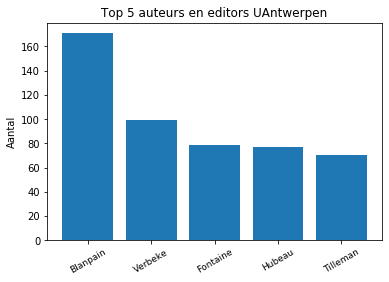

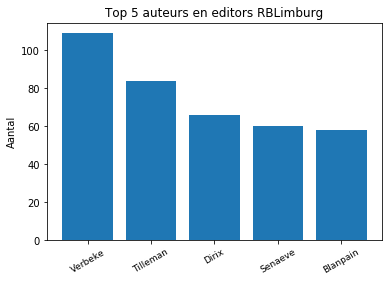

In [12]:
# Analyse 2 : auteurs en editors

# query voor UAntwerpen

query_ua = '''
SELECT DISTINCT
    token.cloi,
    author_fn || ', ' || author_vn as author_name,
    author_fu,
    lib
FROM token
JOIN 
    author on token.cloi = author.cloi
JOIN 
    holding on author.cloi = holding.cloi 
WHERE 
    (author_fu like 'aut' or author_fu like 'edt') 
    and author_fn not like 'e.a.'
    and lib like 'UA-CST' 
    and (holding_ty like 'rech-%' and holding_ty not like 'rech-e%')
'''
cursor.execute(query_ua)
data_ua = {row for row in cursor.fetchall()}
frame_ua = pd.DataFrame(data_ua, columns= ['cloi', 'naam', 'auteurfunctie', 'lib'])
ua_aut = frame_ua['naam'].value_counts()
print("\033[1m" + f'Top 20 auteurs en editors in de UAntwerpen collectie: \033[0m \n{(ua_aut.head(20)).to_string()}\n')

# query voor RBLimburg

query_rbl = '''
SELECT DISTINCT
    token.cloi,
    author_fn || ', ' || author_vn as author_name,
    author_fu,
    lib
FROM token
JOIN 
    author on token.cloi = author.cloi
JOIN 
    holding on author.cloi = holding.cloi 
WHERE 
    (author_fu like 'aut' or author_fu like 'edt') 
    and author_fn not like 'e.a.'
    and lib like 'RBL' and (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
 '''
cursor.execute(query_rbl)
data_rbl = {row for row in cursor.fetchall()}
frame_rbl = pd.DataFrame(data_rbl, columns= ['cloi', 'naam', 'auteurfunctie', 'lib'])
rbl_aut = frame_rbl['naam'].value_counts()
print("\033[1m" + f'Top 20 auteurs en editors in de RBlimburg collectie:\033[0m \n{(rbl_aut.head(20)).to_string()}\n')


# grafieken

bars_ua = ['Blanpain', 'Verbeke', 'Fontaine', 'Hubeau', 'Tilleman']
bars_rbl = ['Verbeke', 'Tilleman', 'Dirix', 'Senaeve', 'Blanpain']

def graph(height, bars, title, index):
    plt.bar(index, height)
    plt.ylabel("Aantal")
    plt.xticks(index, bars, rotation=30, fontsize=9)
    plt.title
    return plt.show()

graph(ua_aut.head(), bars_ua, plt.title('Top 5 auteurs en editors UAntwerpen'), index = np.arange(5))

graph(rbl_aut.head(), bars_rbl, plt.title('Top 5 auteurs en editors RBLimburg'), index = np.arange(5))




## Analyse 3 : uitgevers

Door deze analyse wordt berekend door welke uitgevers de monografieën gepubliceerd werden (top 10). De gegevens zijn helaas onvolledig omdat de catalografen in het verleden het veld van de uitgever niet altijd ingevuld hebben (wanneer de corporatieve auteur dezelfde was als de uitgever, moest deze laatste niet ontsloten worden). Er zijn ook tikfouten in de benamingen gebeurd. Verder kan de naam van de uitgever in de loop der tijd veranderd zijn, waardoor de gegevens niet altijd samen worden geteld. Tenslotte zijn de laatste jaren ook andere catalografische regels in het Anet netwerk veranderd. Tot 2013 moesten de catalografen de naam van de uitgever 'normaliseren', terwijl zij nu de naam onverkort moeten overnemen van de titelpagina. 
Maar we gaan van uit dat deze fouten minimaal zijn geweest. Bovendien hebben we in de berekening via pandas deze afwijkingen proberen op te vangen.
De beperking van de analyse tot de periode 2011-2021 heeft ook vele van deze afwijkingen opgelost.
Van de top 5 wordt er ook een grafische voorstelling getoond.


Top 10 uitgevers in de UAntwerpen collectie (vanaf 2011):  
Intersentia                1022
Larcier                     958
Die Keure                   583
Bruylant                    498
Wolters Kluwer              366
Maklu                       218
Kluwer                      201
LGDJ                        156
Oxford University Press     134
Edward Elgar Publishing     116

Top 10 uitgevers in de RBLimburg collectie (vanaf 2010):  
Larcier                    1200
Bruylant                    760
Intersentia                 757
Die Keure                   593
Anthemis                    525
Wolters Kluwer              396
Kluwer                      251
Maklu                        90
Oxford University Press      67
Acco                         41



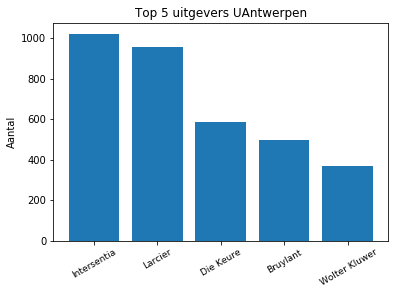

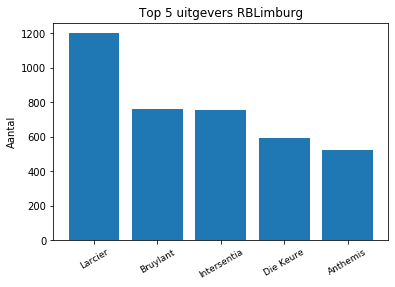

In [20]:
# Analyse 3 : uitgevers

# functie om afwijkingen in de benaming van de uitgevers op te vangen

def clean_frame(frame):
    for char in ['-', '']:
        frame = frame.replace(char, np.nan)
    to_replace = [{'die Keure':'Die Keure'},
                {'die Keure Professional Publishing':'Die Keure'},
                {'larcier':'Larcier'},
                {'LGDJ, une marque de Lextenso':'LGDJ'},
                {'LGDJ, un savoir-faire de Lextenso':'LGDJ'},
                {'larcier':'Larcier'},
                {'larcier':'Larcier'},
                {'bruylant':'Bruylant'},
                {'LGDJ Lextenso':'LGDJ'},
                {'LGDJ, Lextenso éditions':'LGDJ'},
                {'intersentia':'Intersentia'},
                {'Elgar':'Edward Elgar Publishing'},
                {'Edward Elgar':'Edward Elgar Publishing'},
                {'Larcier Legal':'Larcier'},
                {'la Charte':'Die Keure'}]
    for item in to_replace:
        frame["impressum_ug"].replace(item,  inplace=True)
    return frame

# query voor UAntwerpen

query_ua = '''
SELECT DISTINCT
    token.cloi,
    impressum_ju1sv,
    impressum_ug
FROM token
JOIN 
    impressum on token.cloi = impressum.cloi
JOIN 
    holding on impressum.cloi = holding.cloi
WHERE 
    (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') and lib like 'UA-CST'
'''

cursor.execute(query_ua)
data_ua = {row for row in cursor.fetchall()}

frame_ua = pd.DataFrame(data_ua, columns= ['cloi', 'impressum_ju1sv', 'impressum_ug'])
frame_ua = clean_frame(frame_ua)
ua_uitgevers_filt = frame_ua[frame_ua.impressum_ju1sv > '2010']
ua_uitgevers = ua_uitgevers_filt['impressum_ug'].value_counts()
print("\033[1m" + f'Top 10 uitgevers in de UAntwerpen collectie (vanaf 2011):\033[0m  \n{(ua_uitgevers.head(10)).to_string()}\n')


# query voor RBLimburg

query_rbl = '''
SELECT DISTINCT
    token.cloi,
    impressum_ju1sv,
    impressum_ug
FROM token
JOIN
    impressum on token.cloi = impressum.cloi
JOIN 
    holding on impressum.cloi = holding.cloi
WHERE 
    (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
    and lib like 'RBL'
'''

cursor.execute(query_rbl)
data_rbl = {row for row in cursor.fetchall()}
frame_rbl = pd.DataFrame(data_rbl, columns= ['cloi', 'impressum_ju1sv', 'impressum_ug'])
frame_rbl = clean_frame(frame_rbl)
rbl_uitgevers_filt = frame_rbl[frame_rbl.impressum_ju1sv > '2010']
rbl_uitgevers = rbl_uitgevers_filt['impressum_ug'].value_counts()

print("\033[1m" + f'Top 10 uitgevers in de RBLimburg collectie (vanaf 2010):\033[0m  \n{(rbl_uitgevers.head(10)).to_string()}\n')


# grafieken

bars_ua = ['Intersentia', 'Larcier', 'Die Keure',  'Bruylant', ' Wolter Kluwer']
bars_rbl = ['Larcier', 'Bruylant', 'Intersentia', 'Die Keure', 'Anthemis']

graph(ua_uitgevers.head(5), bars_ua,
plt.title('Top 5 uitgevers UAntwerpen'), index = np.arange(5))

graph(rbl_uitgevers.head(5), bars_rbl ,
plt.title('Top 5 uitgevers RBLimburg'), index = np.arange(5))


## Analyse 4 : jaar van uitgave

De bedoeling is na te kijken hoeveel boeken uitgegeven in de periode 2011-2021 terecht gekomen zijn in de collecties. Dit laat toe de performantie qua recente literatuur te meten. 
Er wordt ook een grafische voorstelling van de gegevens getoond.


Jaar van uitgave in de UAntwerpen collectie (2011-2021):  
2015    698
2012    667
2014    657
2016    608
2017    594
2013    588
2011    574
2019    538
2018    510
2020    442
2021    140

Totaal titels:  6016

Jaar van uitgave in de RBLimburg collectie (2011-2021):  
2012    714
2013    622
2011    599
2015    584
2014    570
2016    541
2017    501
2019    491
2018    469
2020    420
2021    125

Totaal titels:  5636



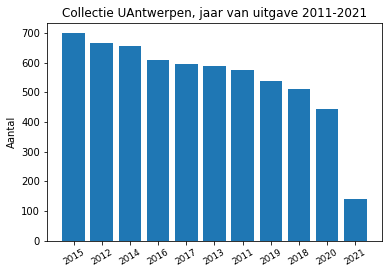

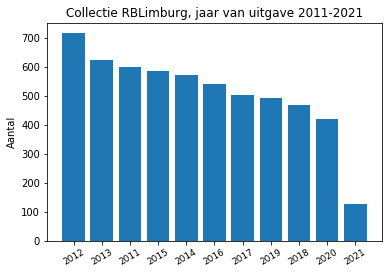

In [14]:
# Analyse 4: boeken gepubliceerd tussen 2009 en 2021 in beide collecties

# query voor UAntwerpen

query_ua = '''
SELECT DISTINCT
    token.cloi,
    impressum_ju1sv
FROM token
JOIN 
    impressum on token.cloi = impressum.cloi
JOIN 
    holding on impressum.cloi = holding.cloi
WHERE 
    (holding_ty like 'rech-%' and holding_ty not like 'rech-e%')  
    and lib like 'UA-CST'
'''

cursor.execute(query_ua)
data_ua = {row for row in cursor.fetchall()}
frame_ua = pd.DataFrame(data_ua, columns= ['cloi', 'impressum_ju1sv'])
ua_jvu_filt = frame_ua[frame_ua.impressum_ju1sv > '2010']
ua_jvu = ua_jvu_filt['impressum_ju1sv'].value_counts()
ua_jvu_som = sum(ua_jvu)
print("\033[1m" + f'Jaar van uitgave in de UAntwerpen collectie (2011-2021):\033[0m  \n{ua_jvu.to_string()}\n')
print("\033[1m" + f'Totaal titels:\033[0m  {ua_jvu_som}\n')

# query voor RBLimburg

query_rbl = '''
SELECT DISTINCT
    token.cloi,
    impressum_ju1sv
FROM token
JOIN 
    impressum on token.cloi = impressum.cloi
JOIN 
    holding on impressum.cloi = holding.cloi
WHERE 
    (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
    and lib like 'RBL'
'''
cursor.execute(query_rbl)
data_rbl = {row for row in cursor.fetchall()}
frame_rbl = pd.DataFrame(data_rbl, columns= ['cloi', 'impressum_ju1sv'])
rbl_jvu_filt = frame_rbl[frame_rbl.impressum_ju1sv > '2010']
rbl_jvu = rbl_jvu_filt['impressum_ju1sv'].value_counts()
rbl_jvu_som = sum(rbl_jvu)

print("\033[1m" + f'Jaar van uitgave in de RBLimburg collectie (2011-2021):\033[0m  \n{rbl_jvu.to_string()}\n')
print("\033[1m" + f'Totaal titels:\033[0m  {rbl_jvu_som}\n')

# grafieken

bars_ua = ['2015', '2012', '2014', '2016', '2017', '2013', '2011', '2019', '2018', '2020', '2021']
bars_rbl = ['2012', '2013', '2011', '2015', '2014', '2016', '2017', '2019', '2018', '2020', '2021']

graph(ua_jvu, bars_ua, plt.title('Collectie UAntwerpen, jaar van uitgave 2011-2021'), index = np.arange(11))
graph(rbl_jvu, bars_rbl, plt.title('Collectie RBLimburg, jaar van uitgave 2011-2021'), index = np.arange(11))


## Analyse 5 : inhoudstaal 

Door deze analyse wordt berekend welke de meest voorkomende talen in de twee collecties zijn. Deze berekening betreft de taal van de inhoud en dus niet de taal van de titel.
Van de top zes wordt er ook een grafische voorstelling getoond.

Top 6 talen in de collectie van UAntwerpen:  
dut    11192
fre     8851
eng     8707
ger     2989
ita      146
spa       42

Top 6 talen in de collectie van RBLimburg:  
dut    6610
fre    3999
eng    1463
ger      72
mul      14
ita       9



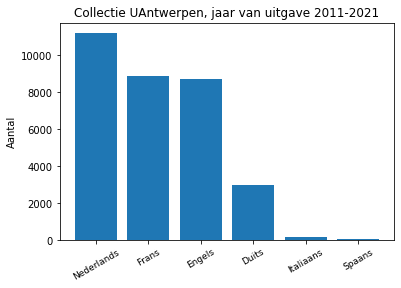

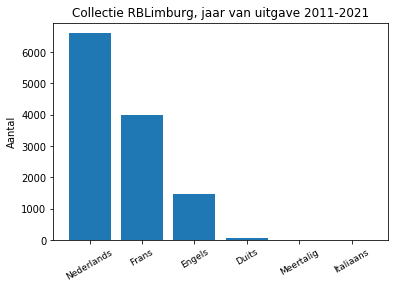

In [15]:
# Analyse 5 : inhoudstaal

# query voor UAntwerpen

query_ua = '''
SELECT DISTINCT
    token.cloi,
    language_lg
FROM token
JOIN 
    language on token.cloi = language.cloi
JOIN 
    holding on language.cloi = holding.cloi
WHERE 
    (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
    and lib like 'UA-CST'
'''
cursor.execute(query_ua)
data_ua = {row for row in cursor.fetchall()}
frame_ua = pd.DataFrame(data_ua, columns= ['cloi', 'language_lg'])
ua_lang = frame_ua['language_lg'].value_counts()

print("\033[1m" + f'Top 6 talen in de collectie van UAntwerpen:\033[0m  \n{(ua_lang.head(6)).to_string()}\n')


# query voor RBLimburg

query_rbl = '''
SELECT DISTINCT
    token.cloi,
    language_lg
FROM token
JOIN 
    language on token.cloi = language.cloi
JOIN 
    holding on language.cloi = holding.cloi
WHERE 
    (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
    and lib like 'RBL'
'''
cursor.execute(query_rbl)
data_rbl = {row for row in cursor.fetchall()}
frame_rbl = pd.DataFrame(data_rbl, columns= ['cloi', 'language_lg'])
rbl_lang = frame_rbl['language_lg'].value_counts()

print("\033[1m" + f'Top 6 talen in de collectie van RBLimburg:\033[0m  \n{(rbl_lang.head(6)).to_string()}\n')

# grafieken

bars_ua = ['Nederlands', 'Frans', 'Engels', 'Duits', 'Italiaans', 'Spaans']
bars_rbl = ['Nederlands', 'Frans', 'Engels', 'Duits', 'Meertalig', 'Italiaans']

graph(ua_lang.head(6), bars_ua, plt.title('Collectie UAntwerpen, jaar van uitgave 2011-2021'), index = np.arange(6))
graph(rbl_lang.head(6), bars_rbl, plt.title('Collectie RBLimburg, jaar van uitgave 2011-2021'), index = np.arange(6))


## Analyse 6 : indexering van de collectie

Door deze analyse wordt berekend welke UDC codes (top 20) gebruikt zijn in Brocade om de twee collecties te ontsluiten. Op deze manier kunnen de speerpunten van onderzoek en onderwijs gereconstrueerd worden, wel wetend uiteraard dat schenkingen of eenmalige onderzoeksprojecten een invloed kunnen hebben op de collectieopbouw.
Van de top vijf wordt er een grafische voorstelling getoond.


UDC codes in de UAntwerpen collectie (top 20):  
Sociaal recht. Arbeidsrecht              2636
Economisch recht                         2354
Strafrecht. Strafprocesrecht             2302
Verbintenissenrecht. Contractenrecht     2186
Gerechtelijk privaatrecht                2053
Fiscaal recht                            1971
Administratief recht                     1906
Europees recht                           1807
Fundamentele rechten en vrijheden        1758
Vennootschapsrecht. Verenigingsrecht     1526
Publiek recht. Staatsrecht               1520
Familierecht. Erfrecht                   1471
Financieel recht                         1236
Industriële en intellectuele eigendom    1235
Internationaal recht                     1045
Onrechtmatige daad                        923
Medisch recht                             832
Internationaal privaatrecht               826
Zakenrecht                                814
Recht                                     758

UDC codes in de RBLimburg coll

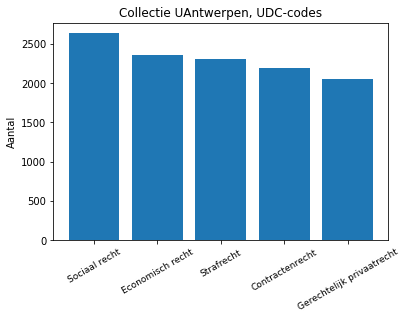

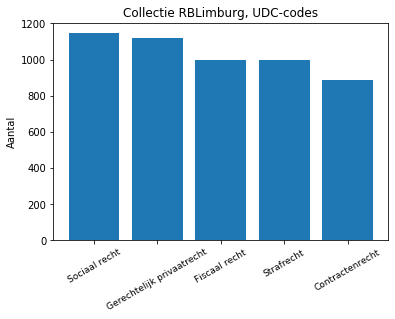

In [16]:
from plotly.graph_objs import Bar, Layout

# Analyse 6 : inhoud van de collectie

# query voor UAntwerpen

query_ua = '''
SELECT DISTINCT 
    token.cloi, 
    subject_ty, 
    subject_ac, 
    subject_vw,
    lib
FROM token
JOIN 
    holding on token.cloi = holding.cloi
JOIN 
    subject on token.cloi = subject.cloi 
WHERE 
    lib like "UA-CST" 
    and (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
    and subject_ty like "U" 
'''

cursor.execute(query_ua)
data_ua = {row for row in cursor.fetchall()}
frame_ua = pd.DataFrame(data_ua, columns= ['cloi', 'subject_ty', 'subject_ac', 'subject_vw', 'lib'])
ua_udc = frame_ua['subject_vw'].value_counts()

print("\033[1m" + f'UDC codes in de UAntwerpen collectie (top 20): \033[0m \n{(ua_udc.head(20)).to_string()}\n')


# query voor RBLimburg

query_rbl = '''
SELECT DISTINCT 
    token.cloi, 
    subject_ty, 
    subject_ac, 
    subject_vw,
    lib
FROM token
JOIN 
    holding on token.cloi = holding.cloi
JOIN 
    subject on token.cloi = subject.cloi 
WHERE 
    lib like "RBL" 
    and (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
    and subject_ty like "U" 
'''
cursor.execute(query_rbl)
data_rbl = {row for row in cursor.fetchall()}
frame_rbl = pd.DataFrame(data_rbl, columns= ['cloi', 'subject_ty', 'subject_ac', 'subject_vw', 'lib'])
rbl_udc = frame_rbl['subject_vw'].value_counts()

print("\033[1m" + f'UDC codes in de RBLimburg collectie (top 20): \033[0m \n{(rbl_udc.head(20)).to_string()}\n')

# grafieken

bars_ua = ['Sociaal recht', 'Economisch recht', 'Strafrecht', 'Contractenrecht', 'Gerechtelijk privaatrecht']
bars_rbl = ['Sociaal recht', 'Gerechtelijk privaatrecht', 'Fiscaal recht', 'Strafrecht', 'Contractenrecht']

graph(ua_udc.head(5), bars_ua, plt.title('Collectie UAntwerpen, UDC-codes'), index = np.arange(5))
graph(rbl_udc.head(5), bars_rbl, plt.title('Collectie RBLimburg, UDC-codes'), index = np.arange(5))
